In [73]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
from multiprocessing import Pool
import tensorflow as tf
from tensorflow.python.ops import nn
from model_DL import *
from functions import *
from metrics import *
from DNN_metrics import *
from data_generator import *
from loss_function import *
from optimization import *


py_file_location = "..."
os.path.abspath(os.path.join(os.path.dirname(py_file_location), os.path.pardir))

#tf.device('GPU:0') 

'/users/yacibena84/CodeVF/2022/GIT-2022'

Data size must be fixed

In [74]:
P1 = 10.0

Primary_ID = [0, 1, 6] 

Secondary_ID = [3, 7]

Nbr_train = int(1E6)

Nbr_test = int(2E5) 

# DNN-parameters :

tau = 0.25

VS = 0.2 # validation_split

Epochs = 500 # Epochs number

BS = 4096 # batch_size

LD = 10**0.5

LR = 10**-4

data_path = "Dataset"


metrics = [Achievable_Rate_DF(tau), QoS_Violation_DF(tau), Primary_Achievable_Rate_Degradation_DF, Primary_ARD_Percentage_DF(tau)] #, QoS_mean_DF, QoS_median_DF

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

  
# Parent Directory path
parent_dir = ""

## Loading the data

In [75]:
### Train ###

dataset_train = np.load(os.path.join(parent_dir,data_path,'dataset_train_GF.npz'))

h_11_tr = dataset_train['h_PP'][:Nbr_train]
h_12_tr = dataset_train['h_PS'][:Nbr_train]
h_1R_tr = dataset_train['h_PR'][:Nbr_train]
h_21_tr = dataset_train['h_SP'][:Nbr_train]
h_22_tr = dataset_train['h_SS'][:Nbr_train]
h_2R_tr = dataset_train['h_SR'][:Nbr_train]
h_R1_tr = dataset_train['h_RP'][:Nbr_train]
h_R2_tr = dataset_train['h_RS'][:Nbr_train]

x_train = np.stack([h_R1_tr, h_11_tr, h_2R_tr, h_1R_tr, h_22_tr, h_R2_tr, h_21_tr, h_12_tr], axis=1)

dataset_test = np.load(os.path.join(parent_dir,data_path,'dataset_val_GF.npz'))

h_11_test = dataset_test['h_PP'][:Nbr_test]
h_12_test = dataset_test['h_PS'][:Nbr_test]
h_1R_test = dataset_test['h_PR'][:Nbr_test]
h_21_test = dataset_test['h_SP'][:Nbr_test]
h_22_test = dataset_test['h_SS'][:Nbr_test]
h_2R_test = dataset_test['h_SR'][:Nbr_test]
h_R1_test = dataset_test['h_RP'][:Nbr_test]
h_R2_test = dataset_test['h_RS'][:Nbr_test]

x_test = np.stack([h_R1_test, h_11_test, h_2R_test, h_1R_test, h_22_test, h_R2_test, h_21_test, h_12_test], axis=1)



## Application of the bruteforce method to imperfect CSI and perfect CSI

In [76]:
try : 
    noise_levels, imperfect_csi_matrix = noise_to_channels(x_test, Primary_ID, Secondary_ID)


    imperfect_csi_results = bruteforce_for_noisy_channels_DF(imperfect_csi_matrix) 


    perfect_csi_results = generate_benchmark_DF(x_test) 

    #----------------------------------Save data----------------------------------------------#

    imperfect_csi_matrix_path = data_path+'/imperfect_csi_matrix_DF'
    np.savez(imperfect_csi_matrix_path, imperfect_csi_matrix)


    imperfect_csi_results_path = data_path+'/imperfect_csi_results_DF'
    np.savez(imperfect_csi_results_path, imperfect_csi_results)


    perfect_csi_results_path = data_path+'/perfect_csi_results_DF'
    np.savez(perfect_csi_results_path, perfect_csi_results)

except FileExistsError : 
    pass

Process ForkPoolWorker-22:
Process ForkPoolWorker-9:
Process ForkPoolWorker-23:
Process ForkPoolWorker-19:
Process ForkPoolWorker-16:
Process ForkPoolWorker-8:
Process ForkPoolWorker-44:
Process ForkPoolWorker-1:
Process ForkPoolWorker-26:
Process ForkPoolWorker-31:
Process ForkPoolWorker-11:
Process ForkPoolWorker-15:
Process ForkPoolWorker-48:
Process ForkPoolWorker-46:
Process ForkPoolWorker-38:
Process ForkPoolWorker-4:
Process ForkPoolWorker-47:
Process ForkPoolWorker-7:
Process ForkPoolWorker-20:
Process ForkPoolWorker-28:
Process ForkPoolWorker-17:
Process ForkPoolWorker-35:
Process ForkPoolWorker-33:
Process ForkPoolWorker-2:
Process ForkPoolWorker-18:
Process ForkPoolWorker-32:
Process ForkPoolWorker-30:
Process ForkPoolWorker-13:
Process ForkPoolWorker-10:
Process ForkPoolWorker-39:
Process ForkPoolWorker-24:
Process ForkPoolWorker-14:
Process ForkPoolWorker-41:
Process ForkPoolWorker-42:
Process ForkPoolWorker-29:
Process ForkPoolWorker-36:
Process ForkPoolWorker-34:
Process

KeyboardInterrupt: 

## Load data

In [77]:
imperfect_csi_matrix_path = data_path+'/imperfect_csi_matrix_DF'

imperfect_csi_matrix = np.load(imperfect_csi_matrix_path+".npz")
imperfect_csi_matrix.files
imperfect_csi_matrix = imperfect_csi_matrix['arr_0']


imperfect_csi_results_path = data_path+'/imperfect_csi_results_DF'

imperfect_csi_results = np.load(imperfect_csi_results_path+".npz")
imperfect_csi_results.files
imperfect_csi_results = imperfect_csi_results['arr_0']



perfect_csi_results_path = data_path+'/perfect_csi_results_DF'

perfect_csi_results = np.load(perfect_csi_results_path+".npz")
perfect_csi_results.files
perfect_csi_results = perfect_csi_results['arr_0']

## Testing the bruteforce method

In [78]:

db_bruteforce = opportunistic_rate_for_noisy_channels_DF(perfect_csi_results, imperfect_csi_results) 
# rate for H without noise
db_benchmark = rate(perfect_csi_results[:,0], perfect_csi_results[:,1], perfect_csi_results[:,2], perfect_csi_results[:,3], perfect_csi_results[:,4], perfect_csi_results[:,5], perfect_csi_results[:,6], perfect_csi_results[:,7], np.sqrt(perfect_csi_results[:,9]), np.sqrt(perfect_csi_results[:,10]), np.sqrt(perfect_csi_results[:,11]))

# List of relative gap between each noisy matrix and benchmark (BF results without noise)

db_gap = np.array([relative_avreage_gap(db_bruteforce[0,:,8], db_benchmark[:,8]),\
                   relative_avreage_gap(db_bruteforce[1,:,8], db_benchmark[:,8]),\
                   relative_avreage_gap(db_bruteforce[2,:,8], db_benchmark[:,8]),\
                   relative_avreage_gap(db_bruteforce[3,:,8], db_benchmark[:,8]),\
                   relative_avreage_gap(db_bruteforce[4,:,8], db_benchmark[:,8]),\
                   relative_avreage_gap(db_bruteforce[5,:,8], db_benchmark[:,8]),\
                   relative_avreage_gap(db_bruteforce[6,:,8], db_benchmark[:,8])])

db_gap = db_gap*100




In [79]:
Mean_ARPD, Max_ARPD, Mean_Outage_ARPD, Outage_ARPD = PARD_for_noisy_data_DF(perfect_csi_results,imperfect_csi_results)


try : 
    #----------------------------------Save data----------------------------------------------#
    path = 'stats'
    os.mkdir(path)
    db_gap_path = path+'/db_gap_DF'
    np.savez(db_gap_path, db_gap)
    
    mean_ARDP_path = path+'/mean_ARDP_DF'
    np.savez(mean_ARDP_path, Mean_ARPD)


    Max_ARPD_path = path+'/max_ARPD_DF'
    np.savez(Max_ARPD_path, Max_ARPD)
    
    Mean_Outage_ARPD_path = path+'/mean_outage_ARPD_DF'
    np.savez(Mean_Outage_ARPD_path,  Mean_Outage_ARPD)
    
    Outage_ARPD_path = path+'/outage_ARPD_DF'
    np.savez(Outage_ARPD_path,  Outage_ARPD)


except FileExistsError : 
    pass

## Deep Neural Network (perfect CSI only)

In [7]:

model = get_model_DF(x_train[:Nbr_train,:], loss_DF_WN(LD,tau), metrics, 'sigmoid', custom_sigmoid, custom_sigmoid, LR)

history = model.fit(x_train[:Nbr_train,:], np.power(x_train[:Nbr_train,:], 2), epochs=Epochs, batch_size=BS, validation_data=(x_test, np.power(x_test, 2)),callbacks=[callback])#validation_split = VS


# -------------- save weights ---------------#


model.save('weights_model/GF_model_DF.h5')
np.save('weights_model/GF_model_DF',history.history)



2022-03-16 15:03:59.045981: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-03-16 15:03:59.047337: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-03-16 15:03:59.104912: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:3b:00.0 name: Quadro RTX 8000 computeCapability: 7.5
coreClock: 1.62GHz coreCount: 72 deviceMemorySize: 44.49GiB deviceMemoryBandwidth: 581.23GiB/s
2022-03-16 15:03:59.105442: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 1 with properties: 
pciBusID: 0000:5e:00.0 name: Quadro RTX 8000 computeCapability: 7.5
coreClock: 1.62GHz coreCount: 72 deviceMemorySize: 44.49GiB deviceMemoryBandwidth: 581.23GiB/s
2022-03-16 15:03:59.105483: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2022-03-16 15:0

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 128)          1152        input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 256)          33024       dense[0][0]                      
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 256)          65792       dense_1[0][0]                    
______________________________________________________________________________________________

2022-03-16 15:04:01.076692: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-03-16 15:04:01.097593: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2400000000 Hz


Epoch 1/500


2022-03-16 15:04:03.510356: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11


 24/245 [=>............................] - ETA: 1s - loss: 47.1870 - throughput: 0.1629 - V_Qos: 0.8051 - Primary_Achievable_Rate_Degradation_DF: 0.5690 - Primary_ARDP: 0.8052 

2022-03-16 15:04:04.168059: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11


245/245 [==============================] - 5s 10ms/step - loss: 14.7136 - throughput: 0.0780 - V_Qos: 0.5109 - Primary_Achievable_Rate_Degradation_DF: 0.3435 - Primary_ARDP: 0.5110 - val_loss: 0.0053 - val_throughput: 0.0056 - val_V_Qos: 0.0272 - val_Primary_Achievable_Rate_Degradation_DF: 0.0443 - val_Primary_ARDP: 0.0272
Epoch 2/500
245/245 [==============================] - 2s 8ms/step - loss: 0.0014 - throughput: 0.0048 - V_Qos: 0.0182 - Primary_Achievable_Rate_Degradation_DF: 0.0379 - Primary_ARDP: 0.0182 - val_loss: -0.0021 - val_throughput: 0.0037 - val_V_Qos: 0.0068 - val_Primary_Achievable_Rate_Degradation_DF: 0.0286 - val_Primary_ARDP: 0.0067
Epoch 3/500
245/245 [==============================] - 2s 8ms/step - loss: -0.0023 - throughput: 0.0036 - V_Qos: 0.0055 - Primary_Achievable_Rate_Degradation_DF: 0.0273 - Primary_ARDP: 0.0055 - val_loss: -0.0026 - val_throughput: 0.0035 - val_V_Qos: 0.0042 - val_Primary_Achievable_Rate_Degradation_DF: 0.0253 - val_Primary_ARDP: 0.0041
Ep

## Testing DNN with imperfect CSI

In [80]:
model_weight_path = "weights_model/GF_model_DF.h5"

DNN_pred = DNN_predictions_DF(imperfect_csi_matrix, model_weight_path)

db_DNN = opportunistic_rate_for_noisy_channels_DNN_DF(perfect_csi_results, DNN_pred)

db_benchmark = rate(perfect_csi_results[:,0], perfect_csi_results[:,1], perfect_csi_results[:,2], perfect_csi_results[:,3], perfect_csi_results[:,4], perfect_csi_results[:,5], perfect_csi_results[:,6], perfect_csi_results[:,7], np.sqrt(perfect_csi_results[:,9]), np.sqrt(perfect_csi_results[:,10]), np.sqrt(perfect_csi_results[:,11]))


db_gap_DNN = np.array([relative_avreage_gap(db_DNN[0,:,8], db_benchmark[:,8]),\
                       relative_avreage_gap(db_DNN[1,:,8], db_benchmark[:,8]),\
                       relative_avreage_gap(db_DNN[2,:,8], db_benchmark[:,8]),\
                       relative_avreage_gap(db_DNN[3,:,8], db_benchmark[:,8]),\
                       relative_avreage_gap(db_DNN[4,:,8], db_benchmark[:,8]),\
                       relative_avreage_gap(db_DNN[5,:,8], db_benchmark[:,8]),\
                       relative_avreage_gap(db_DNN[6,:,8], db_benchmark[:,8])])

db_gap_DNN = db_gap_DNN*100


In [81]:
Mean_ARPD_DNN, Max_ARPD_DNN, Mean_Outage_ARPD_DNN, Outage_ARPD_DNN = PARD_for_noisy_data_DNN_DF(perfect_csi_results, DNN_pred)

In [10]:
try : 
    #----------------------------------Save data----------------------------------------------#
    path = 'stats'
    
    db_gap_path = path+'/db_gap_DNN_DF'
    np.savez(db_gap_path, db_gap_DNN)
    
    mean_ARDP_path = path+'/mean_ARDP_DNN_DF'
    np.savez(mean_ARDP_path, Mean_ARPD_DNN)


    Max_ARPD_path = path+'/max_ARPD_DNN_DF'
    np.savez(Max_ARPD_path, Max_ARPD_DNN)
    
    Mean_Outage_ARPD_path = path+'/mean_outage_ARPD_DNN_DF'
    np.savez(Mean_Outage_ARPD_path,  Mean_Outage_ARPD_DNN)
    
    Outage_ARPD_path = path+'/outage_ARPD_DNN_DF'
    np.savez(Outage_ARPD_path,  Outage_ARPD_DNN)


except FileExistsError : 
    pass

## DNN (Robust training)

## Load imperfect CSI training set

In [11]:
X_train_noised_path = data_path+'X_train_noised'

X_train_noised = np.load(X_train_noised_path+".npz")
X_train_noised.files
X_train_noised = X_train_noised['arr_0']

## Training DNN with imperfect CSI

In [12]:

#-----------------------------------------------------------------------------------------#        

hyperparameters = {'lambda' : LD, 'tau': tau, 'metrics': metrics, 'learning_rate': LR, 'epochs':Epochs, 'batch_size': BS, 'validation_split': VS}
#hyperparameters = [LD, tau, metrics, LR, Epochs, BS, VS]
DNN_for_noisy_channels_DF(x_train[:Nbr_train,:], X_train_noised[:,:Nbr_train,:], hyperparameters)





Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 128)          1152        input_2[0][0]                    
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 256)          33024       dense_7[0][0]                    
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 256)          65792       dense_8[0][0]                    
____________________________________________________________________________________________

In [13]:

loss_history, val_loss_history = plot_history_noised_DNN('weights_model/N_DNN_DF_')    


Text(0, 0.5, 'Loss')

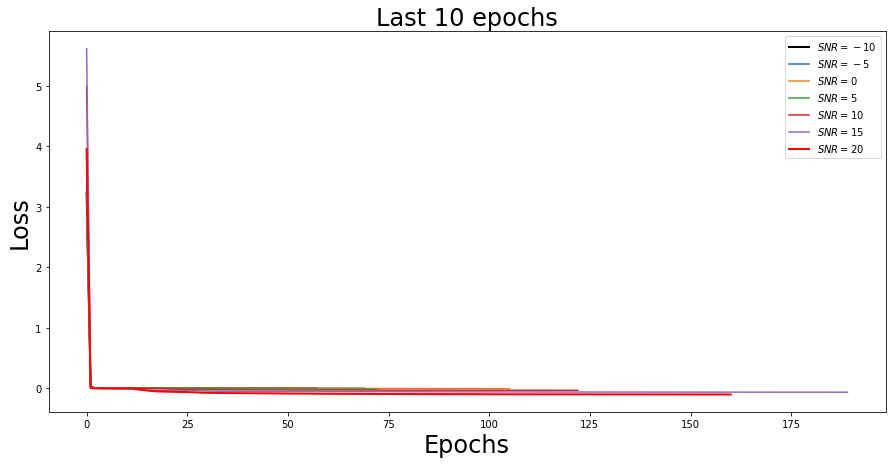

In [14]:
fig, ax = plt.subplots(1,figsize=(15,7), sharey=True)

plt.title("Last 10 epochs", fontsize=24)
ax.plot(np.arange(0,len(loss_history[0]),1), loss_history[0],label="$SNR=-10$",color='black',lw=2)
ax.plot(np.arange(0,len(loss_history[1]),1), loss_history[1],label=r"$SNR=-5$")
ax.plot(np.arange(0,len(loss_history[2]),1), loss_history[2],label=r"$SNR=0$")
ax.plot(np.arange(0,len(loss_history[3]),1), loss_history[3],label=r"$SNR=5$")
ax.plot(np.arange(0,len(loss_history[4]),1), loss_history[4],label=r"$SNR=10$")
ax.plot(np.arange(0,len(loss_history[5]),1), loss_history[5],label=r"$SNR=15$")
ax.plot(np.arange(0,len(loss_history[6]),1), loss_history[6],label=r"$SNR=20$",color='red',lw=2)
#ax.plot(np.arange(0,len(loss_history[1]),1), loss_history[7],label=r"$10^{1.5}$")

ax.legend(loc="best")
plt.xlabel("Epochs",fontsize=24)
plt.ylabel("Loss",fontsize=24)

Text(0, 0.5, 'Validation Loss')

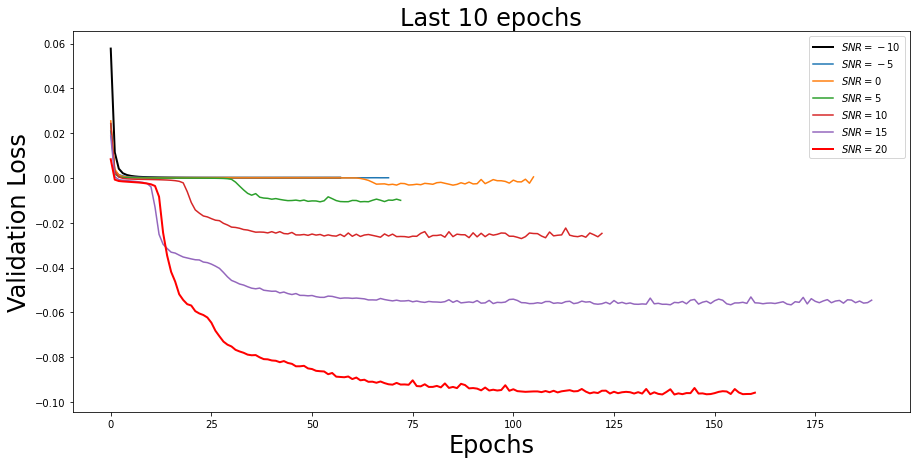

In [15]:
fig, ax = plt.subplots(1,figsize=(15,7))
plt.title("Last 10 epochs", fontsize=24)
ax.plot(np.arange(0,len(val_loss_history[0]),1), val_loss_history[0],label="$SNR=-10$",color='black',lw=2)
ax.plot(np.arange(0,len(val_loss_history[1]),1), val_loss_history[1],label=r"$SNR=-5$")
ax.plot(np.arange(0,len(val_loss_history[2]),1), val_loss_history[2],label=r"$SNR=0$")
ax.plot(np.arange(0,len(val_loss_history[3]),1), val_loss_history[3],label=r"$SNR=5$")
ax.plot(np.arange(0,len(val_loss_history[4]),1), val_loss_history[4],label=r"$SNR=10$")
ax.plot(np.arange(0,len(val_loss_history[5]),1), val_loss_history[5],label=r"$SNR=15$")
ax.plot(np.arange(0,len(val_loss_history[6]),1), val_loss_history[6],label=r"$SNR=20$",color='red',lw=2)
#ax.plot(np.arange(0,len(val_loss_history[1]),1), val_loss_history[7],label=r"$10^{1.5}$")
ax.legend(loc="best")
plt.xlabel("Epochs",fontsize=24)
plt.ylabel("Validation Loss",fontsize=24)

In [82]:

DNN_N_pred = noised_DNN_pred_DF(imperfect_csi_matrix, 'weights_model/N_DNN_DF_')



In [83]:
def db_gap_Dnn(acheivable_rate, acheivable_rate_bruteforce, mul):
    
    db_gap_DNN = np.array([relative_avreage_gap(acheivable_rate[mul,:,8],\
                                                acheivable_rate_bruteforce[:,8])])
    return db_gap_DNN*100

def get_dnn_results(X, bruteforce_rate, SNR_ID= [0, 8, 16, 24, 32, 40, 48]): 
    
    rate_gap, max_pard, mean_pard, mean_outage_pard, outage_pard  = [], [], [], [], []
    for ID in SNR_ID : 
        rate_gap.append(db_gap_Dnn(X["opportunistic_rate"], bruteforce_rate, [ID])) #X[0]
        mean_pard.append(X["mean_ARPD"][ID])
        max_pard.append(X["max_ARPD"][ID])
        mean_outage_pard.append(X["mean_outage"][ID])
        outage_pard.append(X["outage_ARPD"][ID])
    return rate_gap, mean_pard, max_pard, mean_outage_pard, outage_pard

In [84]:
db_N_DNN = opportunistic_rate_for_noisy_channels_DNN_DF(perfect_csi_results, DNN_N_pred)
db_benchmark = rate(perfect_csi_results[:,0], perfect_csi_results[:,1], perfect_csi_results[:,2], perfect_csi_results[:,3], perfect_csi_results[:,4], perfect_csi_results[:,5], perfect_csi_results[:,6], perfect_csi_results[:,7], np.sqrt(perfect_csi_results[:,9]), np.sqrt(perfect_csi_results[:,10]), np.sqrt(perfect_csi_results[:,11]))

Mean_ARPD_N_DNN, Max_ARPD_N_DNN, Mean_Outage_ARPD_N_DNN, Outage_ARPD_N_DNN = PARD_for_noisy_data_DNN_DF(perfect_csi_results, DNN_N_pred)


In [85]:
((np.mean(db_N_DNN[:7][:])-np.mean(db_benchmark))/np.mean(db_benchmark))*100

-8.135397894148658

In [86]:
np.mean(db_N_DNN[:7][:])+0.40

2.3744884022077195

In [87]:
X = {"opportunistic_rate":db_N_DNN, "mean_ARPD":Mean_ARPD_N_DNN,"max_ARPD":Max_ARPD_N_DNN,\
    "mean_outage":Mean_Outage_ARPD_N_DNN, "outage_ARPD":Outage_ARPD_N_DNN}

rate_gap_dnn, mean_pard_dnn, max_pard_dnn, mean_outage_pard_dnn, outage_pard_dnn = get_dnn_results(X, db_benchmark)

In [89]:
try : 
    #----------------------------------Save data----------------------------------------------#
    path = 'stats'
    
    db_gap_path = path+'/db_gap_N_DNN_DF'
    np.savez(db_gap_path, rate_gap_dnn)
    
    mean_ARDP_path = path+'/mean_ARDP_N_DNN_DF'
    np.savez(mean_ARDP_path, mean_pard_dnn)


    Max_ARPD_path = path+'/max_ARPD_N_DNN_DF'
    np.savez(Max_ARPD_path, max_pard_dnn)
    
    Mean_Outage_ARPD_path = path+'/mean_outage_ARPD_N_DNN_DF'
    np.savez(Mean_Outage_ARPD_path,  mean_outage_pard_dnn)
    
    Outage_ARPD_path = path+'/outage_ARPD_N_DNN_DF'
    np.savez(Outage_ARPD_path,  outage_pard_dnn)


except FileExistsError : 
    pass

In [91]:
path = 'stats'

db_gap_path = path+'/db_gap_N_DNN_DF'
np.savez(db_gap_path, rate_gap_dnn)

mean_ARDP_path = path+'/mean_ARDP_N_DNN_DF'
np.savez(mean_ARDP_path, mean_pard_dnn)


Max_ARPD_path = path+'/max_ARPD_N_DNN_DF'
np.savez(Max_ARPD_path, max_pard_dnn)

Mean_Outage_ARPD_path = path+'/mean_outage_ARPD_N_DNN_DF'
np.savez(Mean_Outage_ARPD_path,  mean_outage_pard_dnn)

Outage_ARPD_path = path+'/outage_ARPD_N_DNN_DF'
np.savez(Outage_ARPD_path,  outage_pard_dnn)

